Based on this lecture: https://www.youtube.com/watch?v=OOu5KP3Gvx0

In [104]:
import scipy
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [22]:
file = "tests/line.jpg" 
img = cv2.imread(file)

In [23]:
img2d = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [24]:
img.shape, img2d.shape

((828, 1353, 3), (828, 1353))

In [ ]:
imgFft = scipy.fft.fft2(img2d) # complex numbers
fft2_shifted = scipy.fft.fftshift(imgFft) # shift zero freq to center of the image
magnitude_spectrum = np.log(np.abs(fft2_shifted)) # get magnitude, log scale for visualization


In [41]:
imgFft.shape, fft2_shifted.shape,magnitude_spectrum.shape

((828, 1353), (828, 1353), (828, 1353))

Text(0.5, 1.0, 'Magnitude Spectrum')

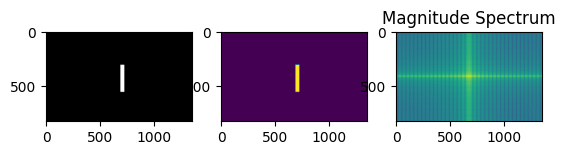

In [ ]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(img)
ax[1].imshow(img2d)
ax[2].imshow(magnitude_spectrum)
ax[2].set_title("Magnitude Spectrum")


In [43]:
rfft = scipy.fft.ifft2(imgFft)

In [44]:
rfft.shape

(828, 1353)

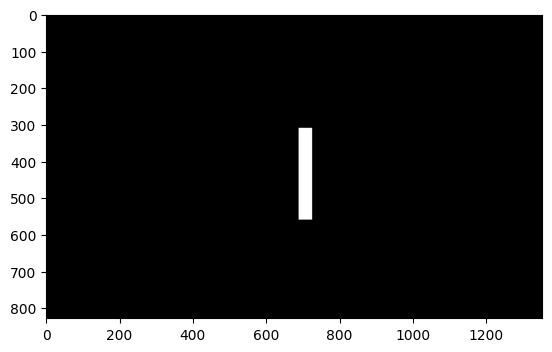

In [49]:
plt.imshow(rfft.real, cmap='gray')

In [83]:
# center frequency to remove
circle = np.zeros(img2d.shape, dtype=np.uint8)
circle.shape

(828, 1353)

In [84]:
img2d.shape

(828, 1353)

In [85]:
radius = 100
center = (np.array(img2d.shape)/2).astype(int) 
center # center of the image

array([414, 676])

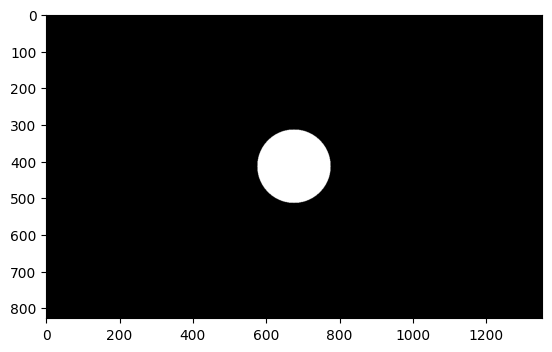

In [86]:
circleMask = cv2.circle(circle, center[::-1], radius, (255,255,255),-1)
plt.imshow(circleMask, cmap='gray')

In [91]:
maskedfft = fft2_shifted*circleMask

C:\Users\bdtho\AppData\Local\Temp\ipykernel_19976\1279772352.py:1: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum_masked = np.log(np.abs(maskedfft))


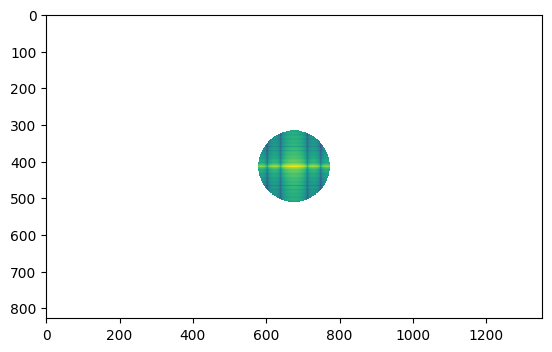

In [96]:
magnitude_spectrum_masked = np.log(np.abs(maskedfft))
plt.imshow(magnitude_spectrum_masked)

In [98]:
# reconstructing image just from this much data
rshift_maskedfft = np.fft.ifftshift(maskedfft) # take reverse shift
rfft_masked = np.fft.ifft2(rshift_maskedfft) # take ifft 
rfft_masked = np.abs(rfft_masked) # get only absolute values
rfft_masked.shape

(828, 1353)

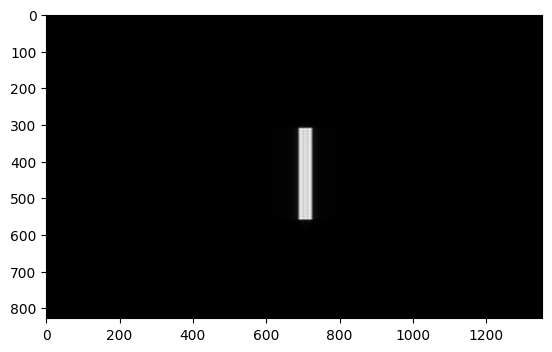

In [101]:
# get the final image after masking
plt.imshow(rfft_masked, cmap='gray')

## Phase


In [145]:
img2 = cv2.imread("tests/test_image.jpg",0) # get grayscale image
img2.shape

(512, 512)

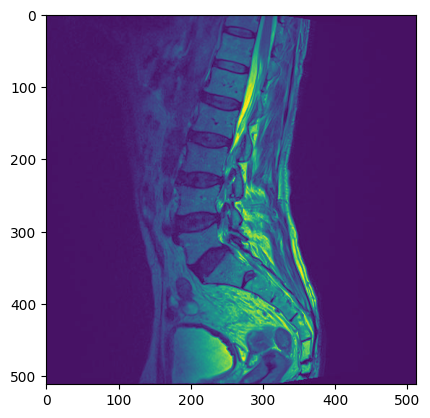

In [146]:
plt.imshow(img2)

In [147]:
fft_img2 = np.fft.fft2(img2)
fft_shifted_img2 = np.fft.fftshift(fft_img2)


In [162]:
# get magnitube and phase
magnitude_img2 = np.abs(fft_shifted_img2)
phase_img2 = np.angle(fft_shifted_img2)
magnitude_img2.shape, phase_img2.shape

((512, 512), (512, 512))

Text(0.5, 1.0, 'Only Magniude Data')

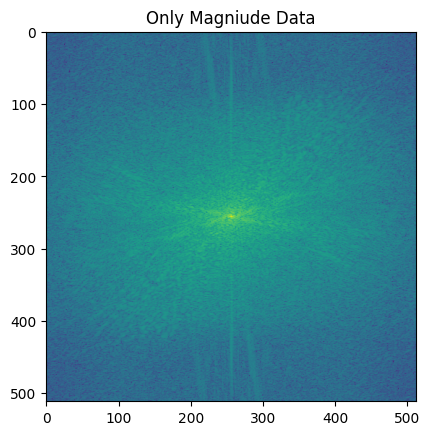

In [174]:
plt.imshow(np.log(np.abs(magnitude_img2)))
plt.title("Only Magniude Data")

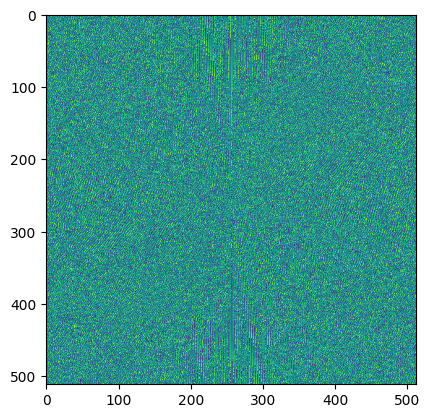

In [164]:
plt.imshow(phase_img2)

array([[191.        , 122.62495515, 268.07536147, ..., 676.14694455,
        268.07536147, 122.62495515],
       [339.62562793, 246.83945467, 318.3723469 , ..., 177.60572985,
        246.87747904, 466.73865009],
       [101.42438201, 227.06563139, 533.33707204, ..., 197.90060189,
        149.83684993, 113.08291906],
       ...,
       [144.28016374, 438.73724329, 465.2791709 , ..., 759.97047339,
        768.0585149 , 466.9700034 ],
       [101.42438201, 113.08291906, 149.83684993, ..., 697.83377741,
        533.33707204, 227.06563139],
       [339.62562793, 466.73865009, 246.87747904, ..., 649.28974464,
        318.3723469 , 246.83945467]])

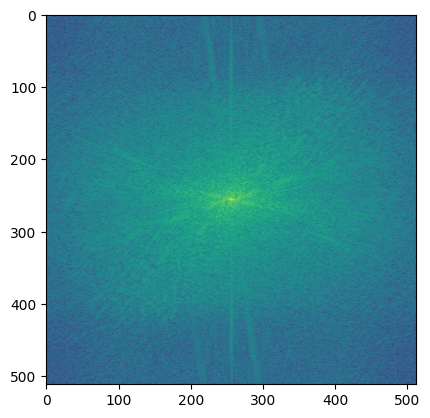

In [183]:
# set phase to zero
# new_fft_img2 = magnitude_img2 * np.exp(1j*phase_img2) # to get the actual phase
new_fft_img2 = magnitude_img2 * np.exp(1j*0)  # to zero the phase
plt.imshow(np.log(np.abs(new_fft_img2)))


In [184]:
r_new_fft_img2 = np.fft.ifftshift(new_fft_img2) # get ifftshited 
r_new_img2 = np.fft.ifft2(r_new_fft_img2) # get ifft2
new_img2 = np.real(r_new_img2) # get real values only
new_img2 = cv2.normalize(new_img2, None, 0, 255, cv2.NORM_MINMAX) # normalize 


Text(0.5, 1.0, 'After the phase is zeroed')

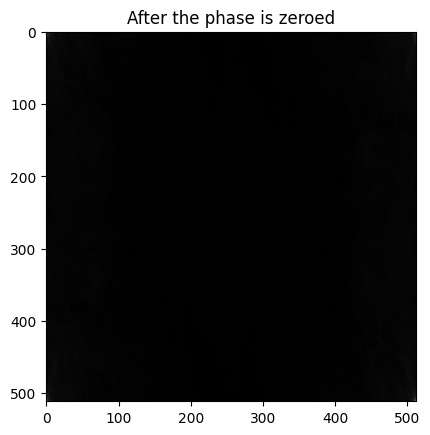

In [185]:
plt.imshow(new_img2, cmap='gray')
plt.title("After the phase is zeroed")

#### Only Phase kept, magnitude constant

In [189]:
# we will get the magnitude from the random image (test_image2) and join the phases of the first image and built it back

img3 = cv2.imread("tests/test_image.jpg", 0)
img4 = cv2.imread("tests/test_image2.jpg",0)

In [190]:
img3.shape, img4.shape

AttributeError: 'NoneType' object has no attribute 'shape'

## Butter Singal

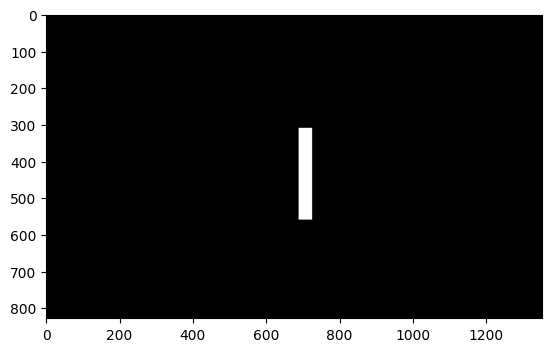

In [105]:
# using butter from scipy.signal
plt.imshow(img)

In [ ]:
sos = signal.butter(10,15, 'hp', oiput)